In [28]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import boston_housing   

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [5]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [13]:
def normalize_data(data):
    mean = data.mean(axis=0)
    data -= mean
    std = data.std(axis=0)
    data /= std
    return data


In [14]:
x_data = normalize_data(train_data)

In [15]:
x_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [20]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(x_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model    

In [30]:
model = build_model()
history = model.fit(x_data, train_labels, validation_split=0.2, batch_size=1, epochs=200)

Epoch 1/200
323/323 [==============================] - 1s 2ms/step - loss: 236.1019 - mae: 11.4296 - val_loss: 58.3048 - val_mae: 5.1280
Epoch 2/200
323/323 [==============================] - 0s 1ms/step - loss: 31.7843 - mae: 3.7829 - val_loss: 28.7548 - val_mae: 3.5032
Epoch 3/200
323/323 [==============================] - 0s 1ms/step - loss: 22.3765 - mae: 3.0581 - val_loss: 21.7117 - val_mae: 3.1417
Epoch 4/200
323/323 [==============================] - 0s 1ms/step - loss: 17.8768 - mae: 2.7404 - val_loss: 15.9883 - val_mae: 2.8954
Epoch 5/200
323/323 [==============================] - 0s 1ms/step - loss: 15.9043 - mae: 2.6109 - val_loss: 15.6333 - val_mae: 2.9053
Epoch 6/200
323/323 [==============================] - 0s 1ms/step - loss: 14.5577 - mae: 2.5656 - val_loss: 13.3929 - val_mae: 2.6361
Epoch 7/200
323/323 [==============================] - 0s 1ms/step - loss: 13.5641 - mae: 2.3721 - val_loss: 13.6384 - val_mae: 2.7027
Epoch 8/200
323/323 [==============================] 

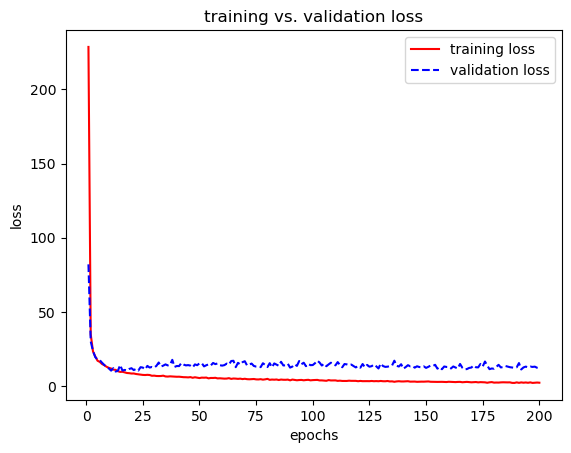

In [29]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r-', label='training loss')
plt.plot(epochs, val_loss_values, 'b--', label='validation loss')
plt.title('training vs. validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()